In [41]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lubridate)
library(scales)

In [16]:
df <- read.csv("/content/all_stocks_5yr.csv")

In [17]:
df_aal <- df %>% filter(Name == "AAL")

# Data summarization

In [18]:
cat("First 6 rows","\n")
print(head(df_aal))
cat("\n")
cat("Last 6 rows","\n")
print(tail(df_aal))
tail(df_aal)
str(df_aal)


First 6 rows 
        date  open  high   low close   volume Name
1 2013-02-08 15.07 15.12 14.63 14.75  8407500  AAL
2 2013-02-11 14.89 15.01 14.26 14.46  8882000  AAL
3 2013-02-12 14.45 14.51 14.10 14.27  8126000  AAL
4 2013-02-13 14.30 14.94 14.25 14.66 10259500  AAL
5 2013-02-14 14.94 14.96 13.16 13.99 31879900  AAL
6 2013-02-15 13.93 14.61 13.93 14.50 15628000  AAL

Last 6 rows 
           date  open  high   low close  volume Name
1254 2018-01-31 53.08 54.71 53.00 54.32 5962937  AAL
1255 2018-02-01 54.00 54.64 53.59 53.88 3623078  AAL
1256 2018-02-02 53.49 53.99 52.03 52.10 5109361  AAL
1257 2018-02-05 51.99 52.39 49.75 49.76 6878284  AAL
1258 2018-02-06 49.32 51.50 48.79 51.18 6782480  AAL
1259 2018-02-07 50.91 51.98 50.89 51.40 4845831  AAL


,date,open,high,low,close,volume,Name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1254,2018-01-31,53.08,54.71,53.00,54.32,5962937,AAL
1255,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1256,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1257,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1258,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1259,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


'data.frame':	1259 obs. of  7 variables:
 $ date  : chr  "2013-02-08" "2013-02-11" "2013-02-12" "2013-02-13" ...
 $ open  : num  15.1 14.9 14.4 14.3 14.9 ...
 $ high  : num  15.1 15 14.5 14.9 15 ...
 $ low   : num  14.6 14.3 14.1 14.2 13.2 ...
 $ close : num  14.8 14.5 14.3 14.7 14 ...
 $ volume: int  8407500 8882000 8126000 10259500 31879900 15628000 11354400 14725200 11922100 6071400 ...
 $ Name  : chr  "AAL" "AAL" "AAL" "AAL" ...


# Cleaning the dataset Before Analysis

In [19]:
df_aal$date <- as.Date(df_aal$date)
head(df_aal)
colnames(df_aal)[7] <- "company_name"
colnames(df_aal)

,date,open,high,low,close,volume,Name
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
3,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
4,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
5,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
6,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL


[1] "date"         "open"         "high"         "low"          "close"       
[6] "volume"       "company_name"

In [20]:
min(df_aal$date)
max(df_aal$date)

[1] "2013-02-08"

[1] "2018-02-07"

# Statistical Analysis
* Min, Max, What is the range , Median, Mean, Quantile distribution, Standard Deviation, Variance

In [34]:
df_aal %>%
  select(open, high, low, close, volume) %>%
  summary()


      open            high            low            close      
 Min.   :13.14   Min.   :13.42   Min.   :12.70   Min.   :13.02  
 1st Qu.:34.20   1st Qu.:34.93   1st Qu.:33.69   1st Qu.:34.33  
 Median :40.93   Median :41.43   Median :40.21   Median :40.87  
 Mean   :38.39   Mean   :38.96   Mean   :37.83   Mean   :38.39  
 3rd Qu.:46.56   3rd Qu.:47.19   3rd Qu.:45.99   3rd Qu.:46.53  
 Max.   :58.79   Max.   :59.08   Max.   :57.80   Max.   :58.47  
     volume         
 Min.   :  1352400  
 1st Qu.:  5696393  
 Median :  8111323  
 Mean   :  9390321  
 3rd Qu.: 11188535  
 Max.   :137767165  

# Data Analysis and Visualization

# Visualizing trend of the high and low of American Air lines over the 5 Years

In [22]:
options(repr.plot.width = 30, repr.plot.height = 10)

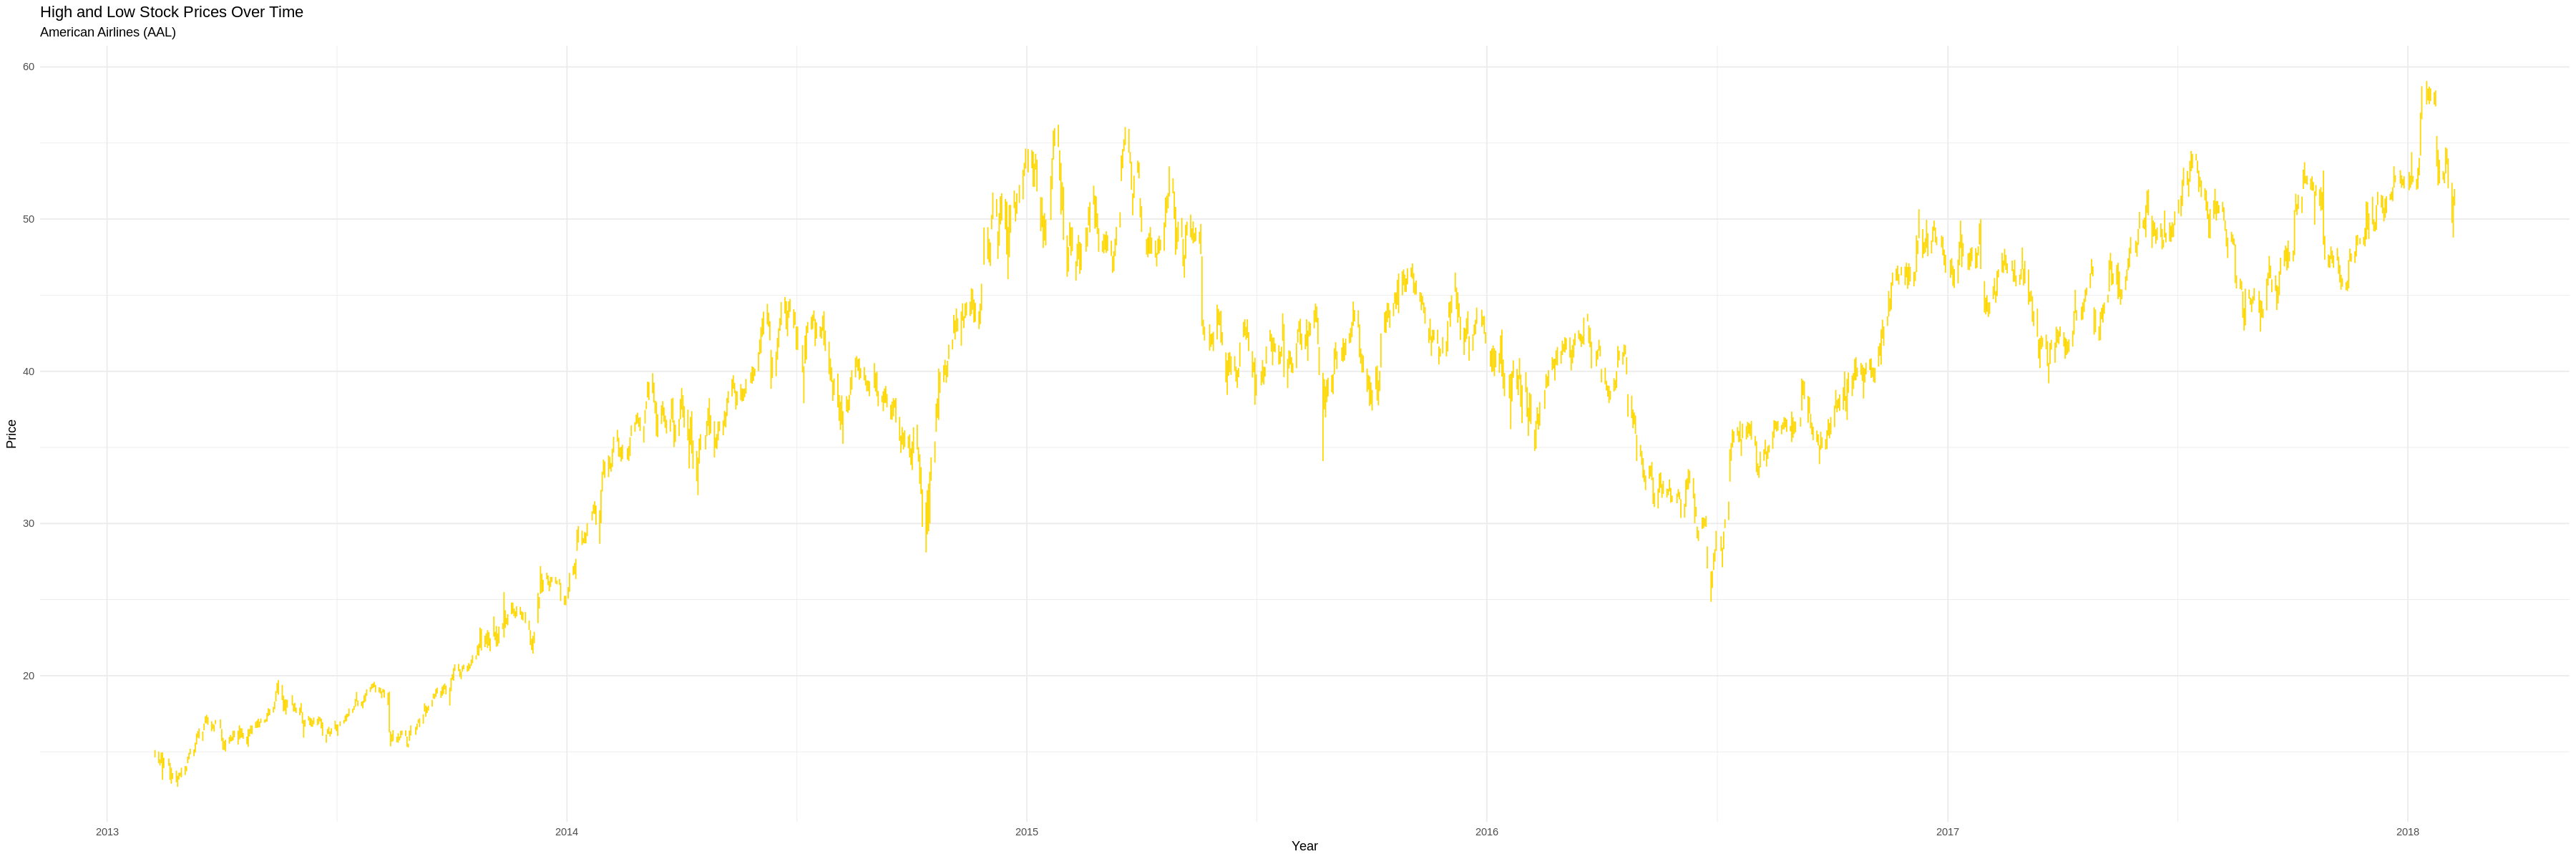

In [35]:
ggplot(df_aal, aes(x = date)) +
  geom_segment(aes(y = low, yend = high),
               color = "gold") +
  labs(
    title = "High and Low Stock Prices Over Time",
    subtitle = "American Airlines (AAL)",
    x = "Year",
    y = "Price"
  ) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  theme_minimal()


# Visualizing Stock's prices in one Graph (Open, Close, High, Low) for Year of  2017 and 2018

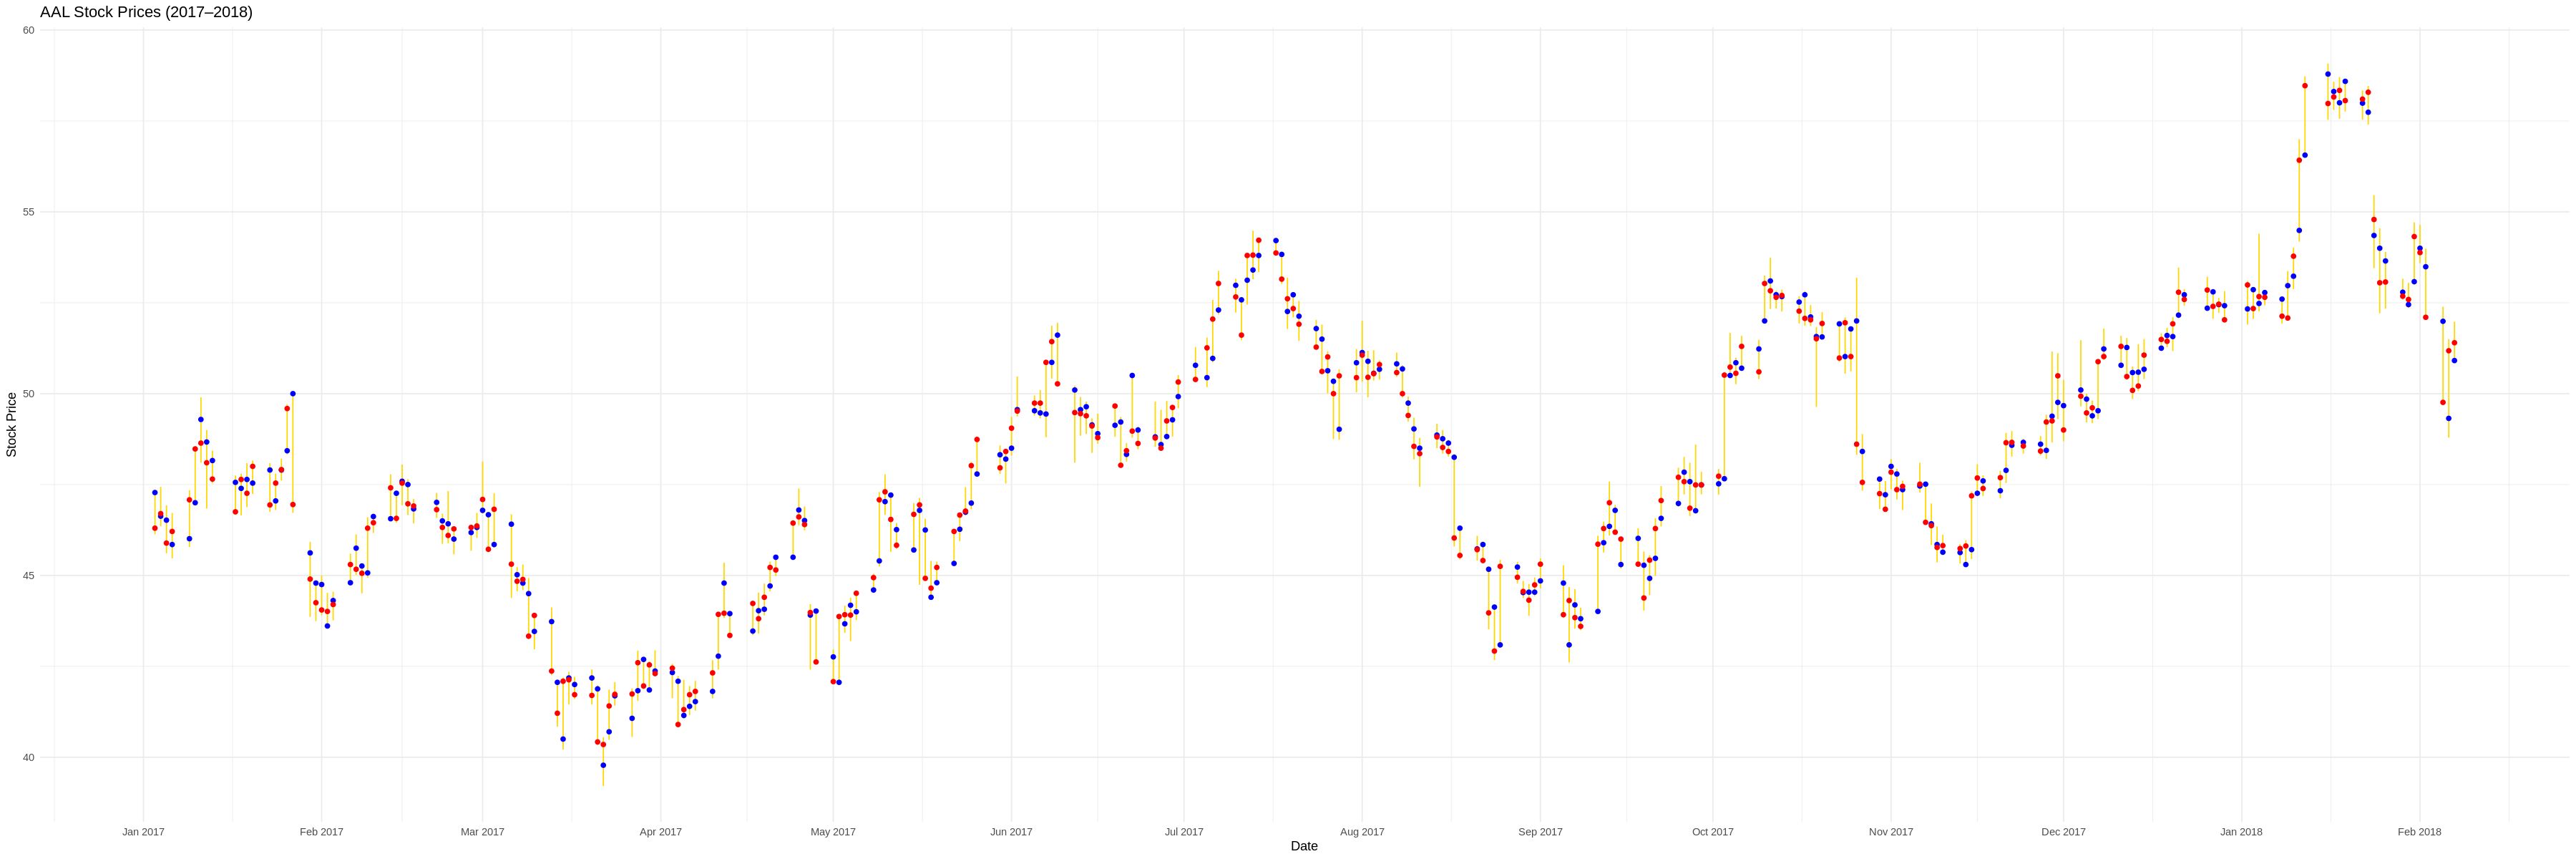

In [36]:
aal_17_18 <- df_aal %>%
  filter(year(date) %in% c(2017, 2018))
ggplot(aal_17_18, aes(date)) +
  geom_segment(aes(y = low, yend = high), color = "gold") +
  geom_point(aes(y = open), color = "blue") +
  geom_point(aes(y = close), color = "red") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  labs(
    title = "AAL Stock Prices (2017–2018)",
    x = "Date",
    y = "Stock Price"
  ) +
  theme_minimal()


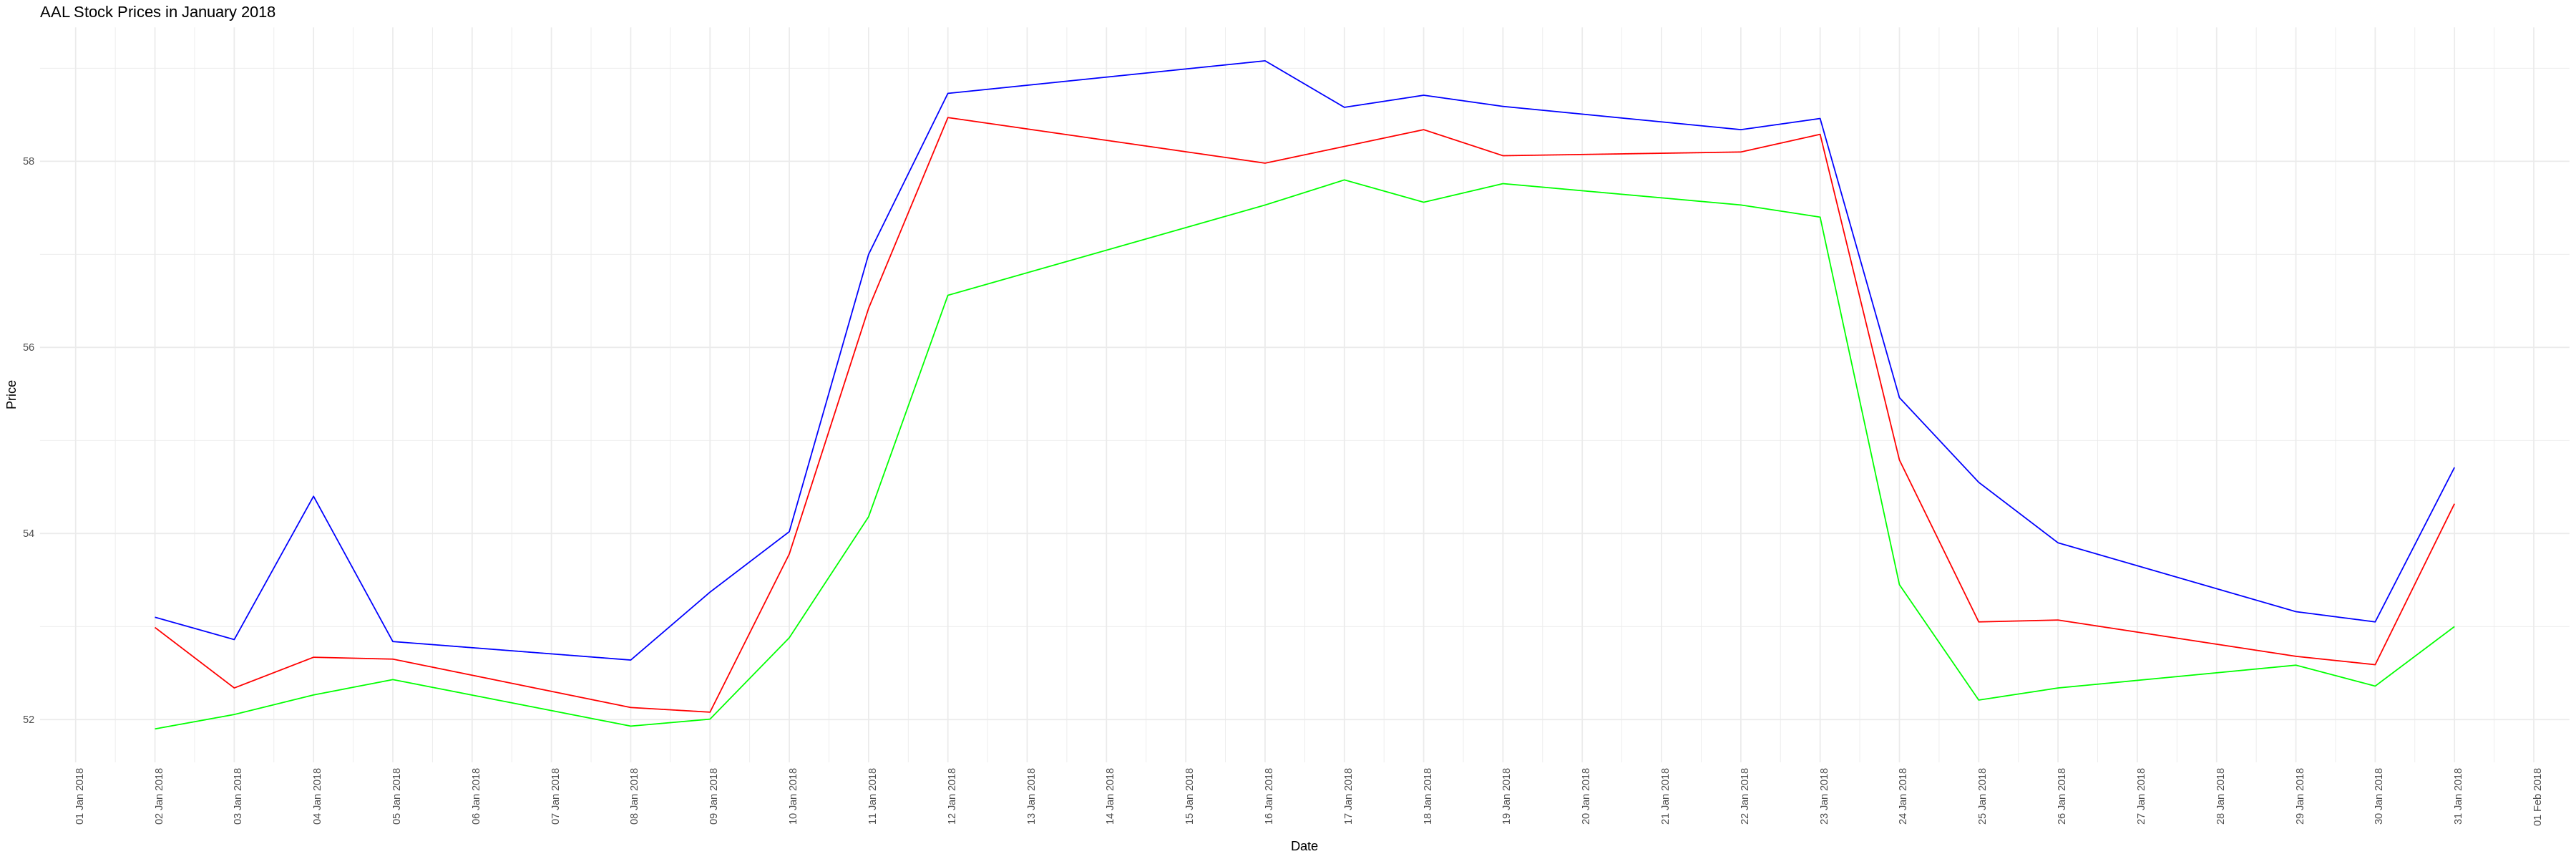

In [37]:
df_aal %>%
  filter(year(date) == 2018, month(date) == 1) %>%
  ggplot(aes(x = date)) +
  geom_line(aes(y = close), color = "red") +
  geom_line(aes(y = high), color = "blue") +
  geom_line(aes(y = low), color = "green") +
  scale_x_date(date_breaks = "1 day", date_labels = "%d %b %Y") +
  labs(
    title = "AAL Stock Prices in January 2018",
    x = "Date",
    y = "Price"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


Though the Line graph we can see clearly,
* Highest price value for "High Price" is 59.08 that reported on 16th of January, 2018.
* 58.47 is highest close price for AAL for this time period(2013 - 2018) and that price reported on 12th of January, 2018


# Aanlyzing and comparing Stock's Prices for selected 5 Companies.

Companies are
* AAL - American air Lines
* AMZN - Amazon
* NFLX - Netfilx
* MGM - MGM Resorts International
* MSFT - Microsoft


In [26]:
df1 <- read.csv('/content/all_stocks_5yr.csv')
filtered_data1 <- df1 %>% select(Name, date, open, high, low, close, volume) %>% filter(Name %in% c('AAL', 'AMZN', 'NFLX', 'MGM', 'MSFT'))
summary(filtered_data1)
head(filtered_data1)

     Name               date                open              high        
 Length:6295        Length:6295        Min.   :  12.00   Min.   :  12.04  
 Class :character   Class :character   1st Qu.:  31.89   1st Qu.:  32.26  
 Mode  :character   Mode  :character   Median :  47.95   Median :  48.64  
                                       Mean   : 156.95   Mean   : 158.50  
                                       3rd Qu.: 123.91   3rd Qu.: 125.74  
                                       Max.   :1477.39   Max.   :1498.00  
      low              close             volume         
 Min.   :  11.72   Min.   :  11.99   Min.   :   950725  
 1st Qu.:  31.55   1st Qu.:  31.91   1st Qu.:  4883432  
 Median :  47.39   Median :  47.90   Median :  8998943  
 Mean   : 155.27   Mean   : 156.97   Mean   : 14384240  
 3rd Qu.: 122.23   3rd Qu.: 123.72   3rd Qu.: 19125814  
 Max.   :1450.04   Max.   :1450.89   Max.   :248354245  

,Name,date,open,high,low,close,volume
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,AAL,2013-02-08,15.07,15.12,14.63,14.75,8407500
2,AAL,2013-02-11,14.89,15.01,14.26,14.46,8882000
3,AAL,2013-02-12,14.45,14.51,14.10,14.27,8126000
4,AAL,2013-02-13,14.30,14.94,14.25,14.66,10259500
5,AAL,2013-02-14,14.94,14.96,13.16,13.99,31879900
6,AAL,2013-02-15,13.93,14.61,13.93,14.50,15628000


Second Way
* Import csv file seperately and combined together using rbind.

In [27]:
aal  <- read.csv('/content/AAL_data.csv')
amzn <- read.csv('/content/AMZN_data.csv')
mgm  <- read.csv('/content/MGM_data.csv')
msft <- read.csv('/content/MSFT_data.csv')
nflx <- read.csv('/content/NFLX_data.csv')

# Cheking column names of all data set's before bind them
colnames(aal)
colnames(amzn)
colnames(mgm)
colnames(msft)
colnames(nflx)

df_5 <- rbind(aal,amzn,mgm,msft,nflx)
#checking sample from the data sets
sample_data <- df_5 %>% sample_frac(0.003)
sample_data


[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

date,open,high,low,close,volume,Name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
2013-05-10,30.9157,31.3928,30.6514,31.0991,18844490,NFLX
2017-10-13,30.0300,30.2100,29.5577,29.7400,12380941,MGM
2013-11-04,35.5900,35.9800,35.5500,35.9400,28061873,MSFT
2017-12-01,186.9900,189.8000,185.0000,186.8200,6219531,NFLX
2017-06-16,69.7300,70.0252,69.2200,70.0000,48345085,MSFT
2014-04-11,47.2571,47.8314,46.2300,46.6728,30165856,NFLX
2013-03-25,26.0614,26.4057,25.6814,25.8271,15024583,NFLX
2015-11-04,54.1800,54.8800,54.0600,54.4000,37087849,MSFT
2015-10-19,98.0700,103.6200,96.2600,101.6900,29964714,NFLX


In [28]:
colnames(df_5)
colnames(df_5)[7]<- "company_name"
colnames(df_5)

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"         "open"         "high"         "low"          "close"       
[6] "volume"       "company_name"

**Visualizing Total Volume for 5 companies over the 5 years**


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




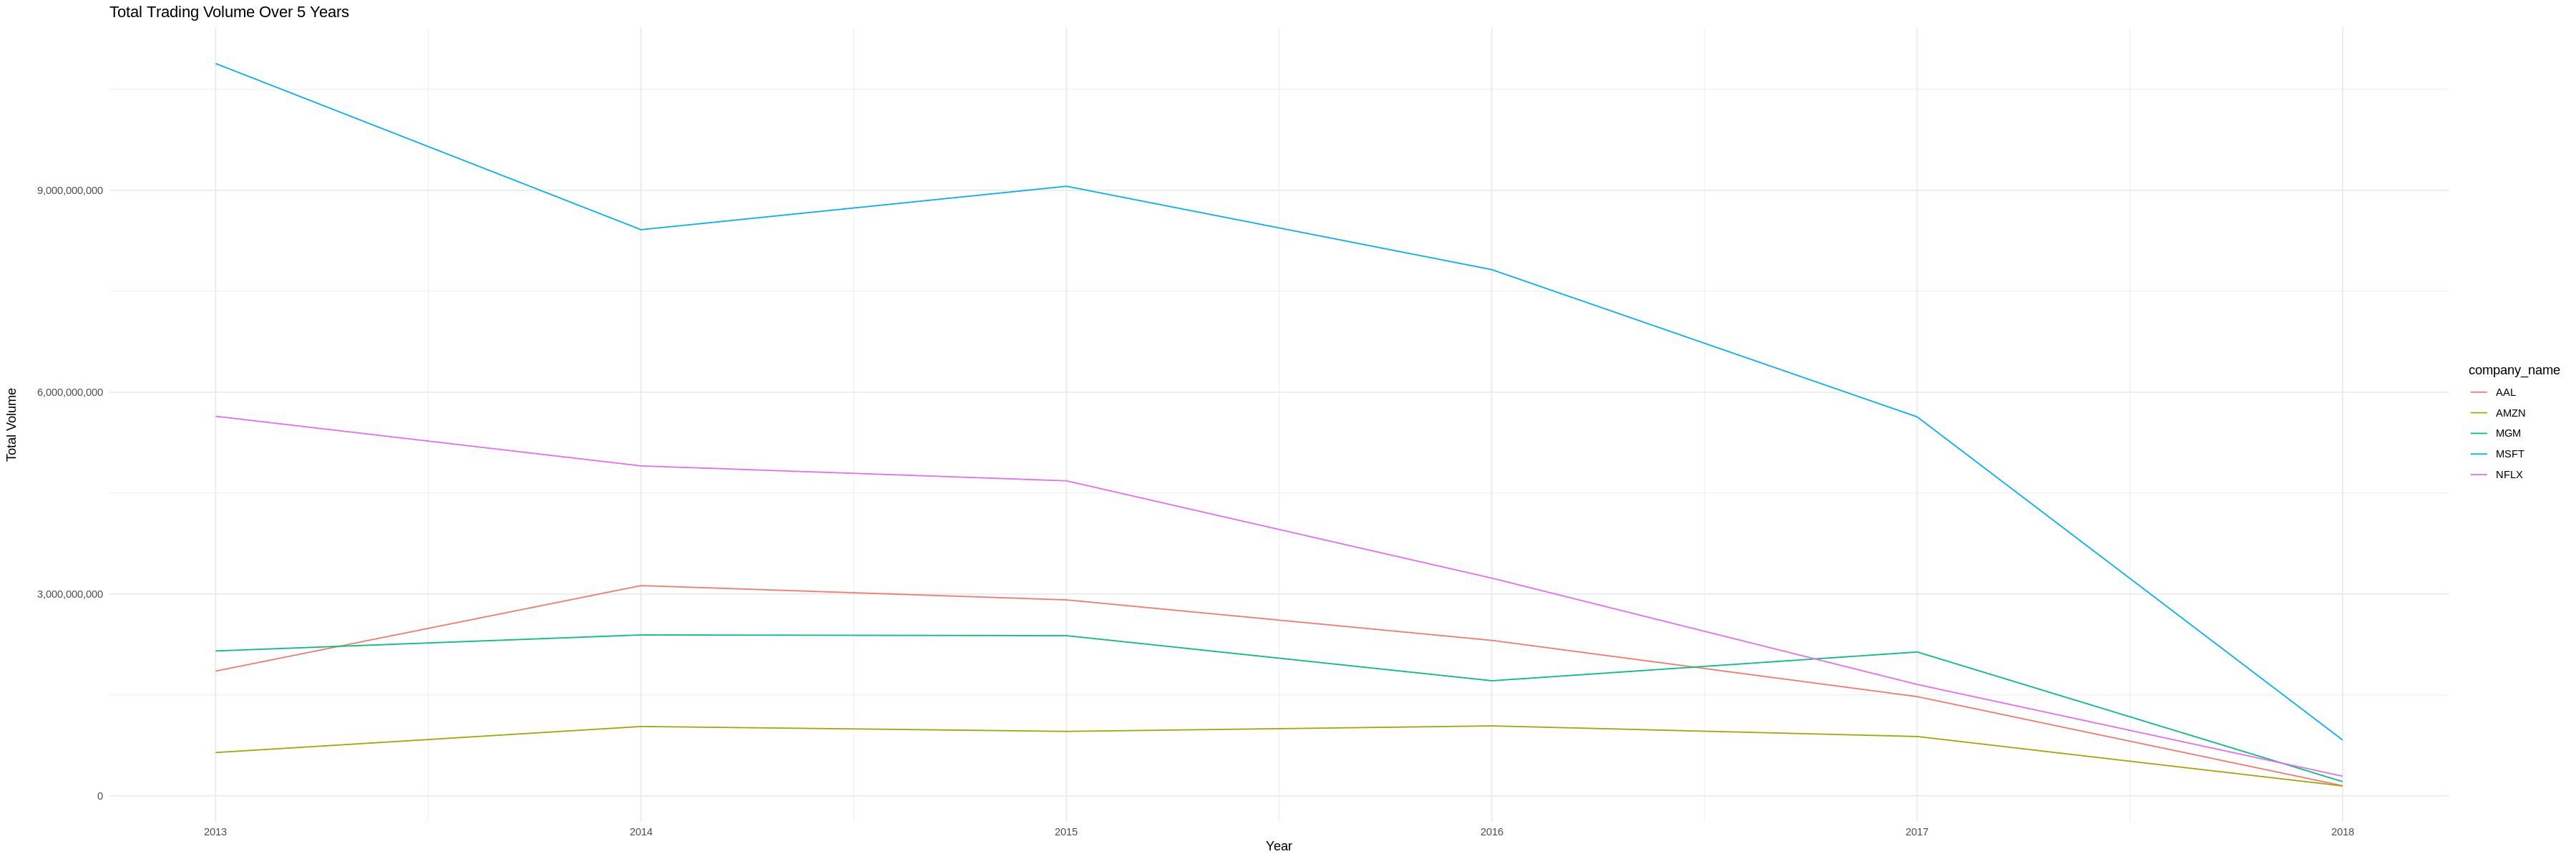

In [40]:
df_5 %>%
  mutate(date = as.Date(date),
         year = year(date)) %>%
  group_by(company_name, year) %>%
  summarise(total_volume = sum(volume), .groups = "drop") %>%
  ggplot(aes(x = year, y = total_volume, color = company_name)) +
  geom_line() +
  scale_y_continuous(labels = comma) +
  labs(
    title = "Total Trading Volume Over 5 Years",
    x = "Year",
    y = "Total Volume"
  ) +
  theme_minimal()

**Creating Pie Chart to see Contribution of Each company**

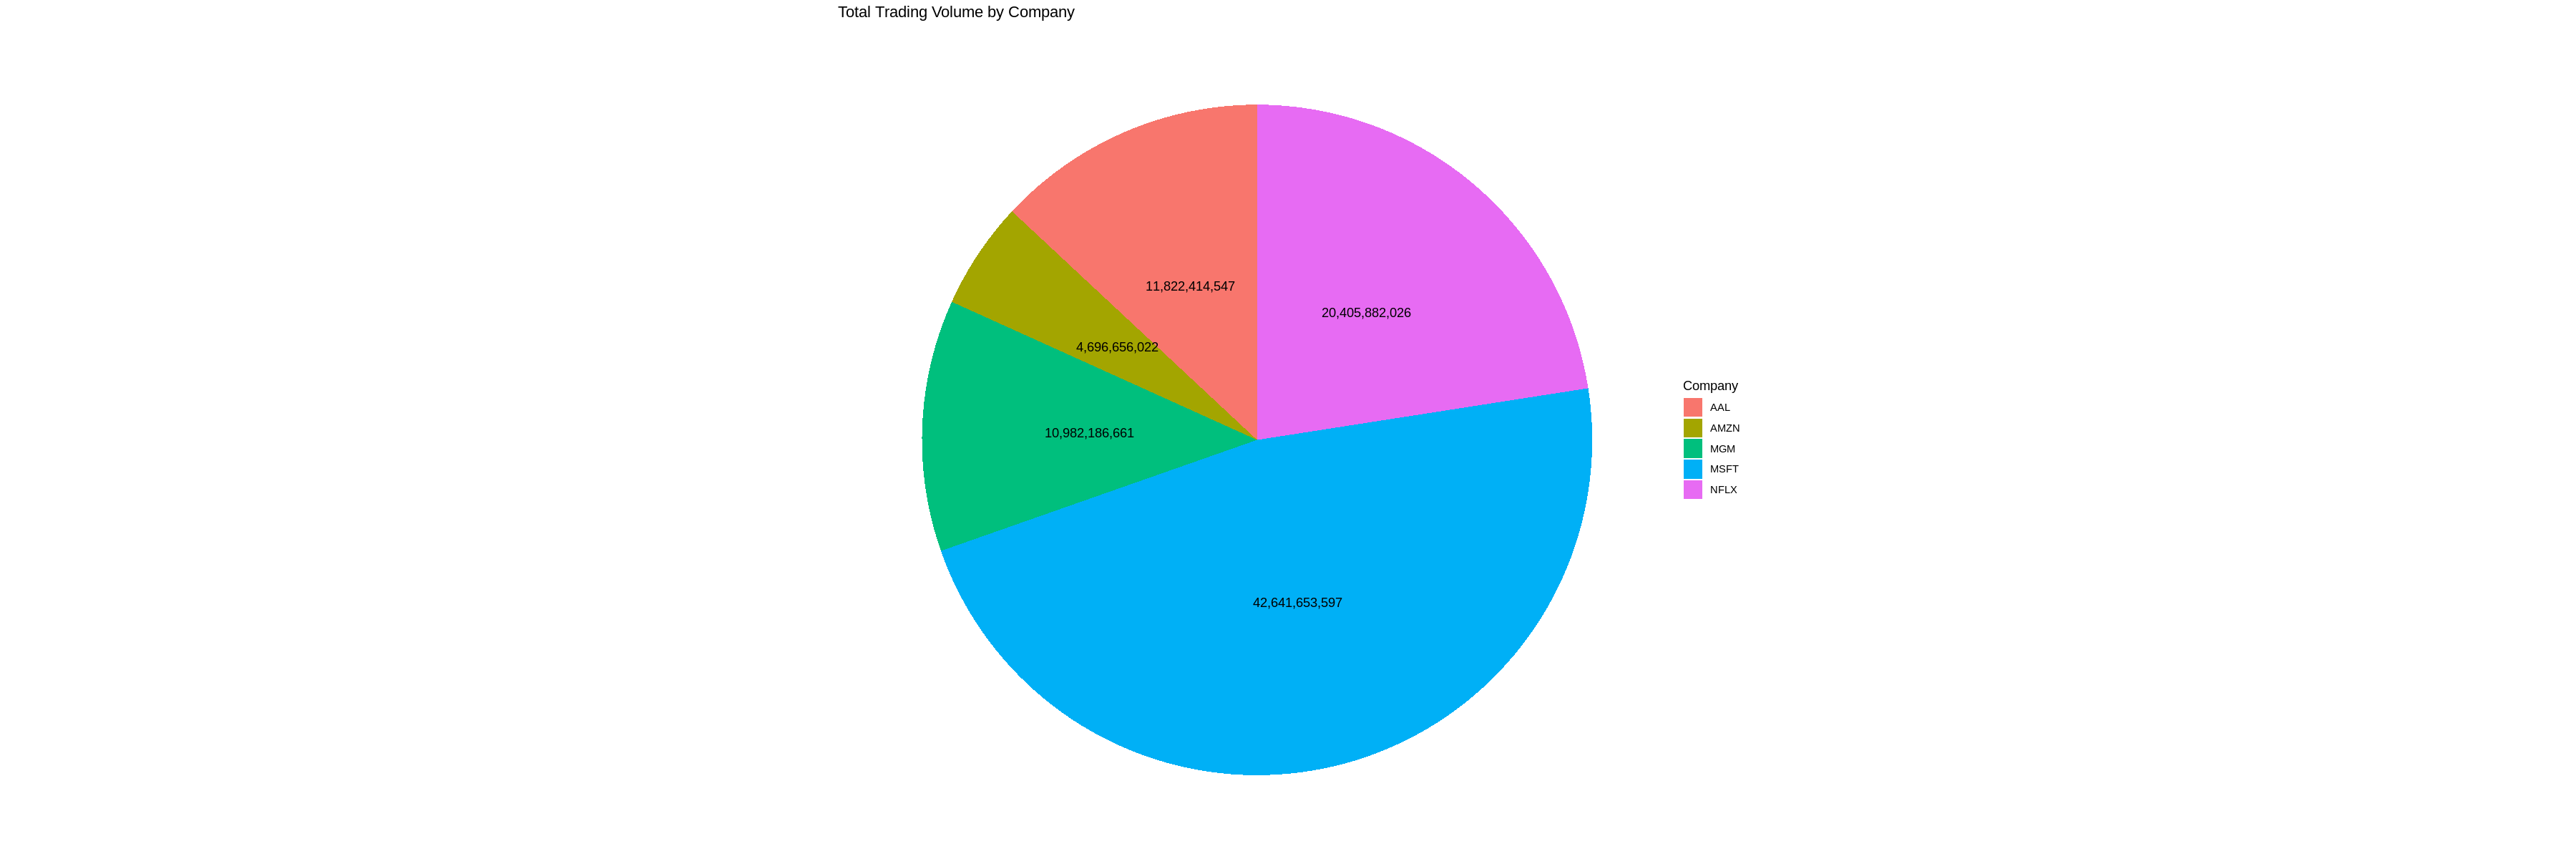

In [42]:
df_5 %>%
  group_by(company_name) %>%
  summarise(total_volume = sum(volume), .groups = "drop") %>%
  ggplot(aes(x = "", y = total_volume, fill = company_name)) +
  geom_col(width = 1) +
  coord_polar("y") +
  scale_y_continuous(labels = comma) +
  geom_text(aes(label = comma(total_volume)),
            position = position_stack(vjust = 0.5)) +
  labs(
    title = "Total Trading Volume by Company",
    fill = "Company"
  ) +
  theme_void()

**Creating Box Plot for compare the distribution of the 5 Companies**

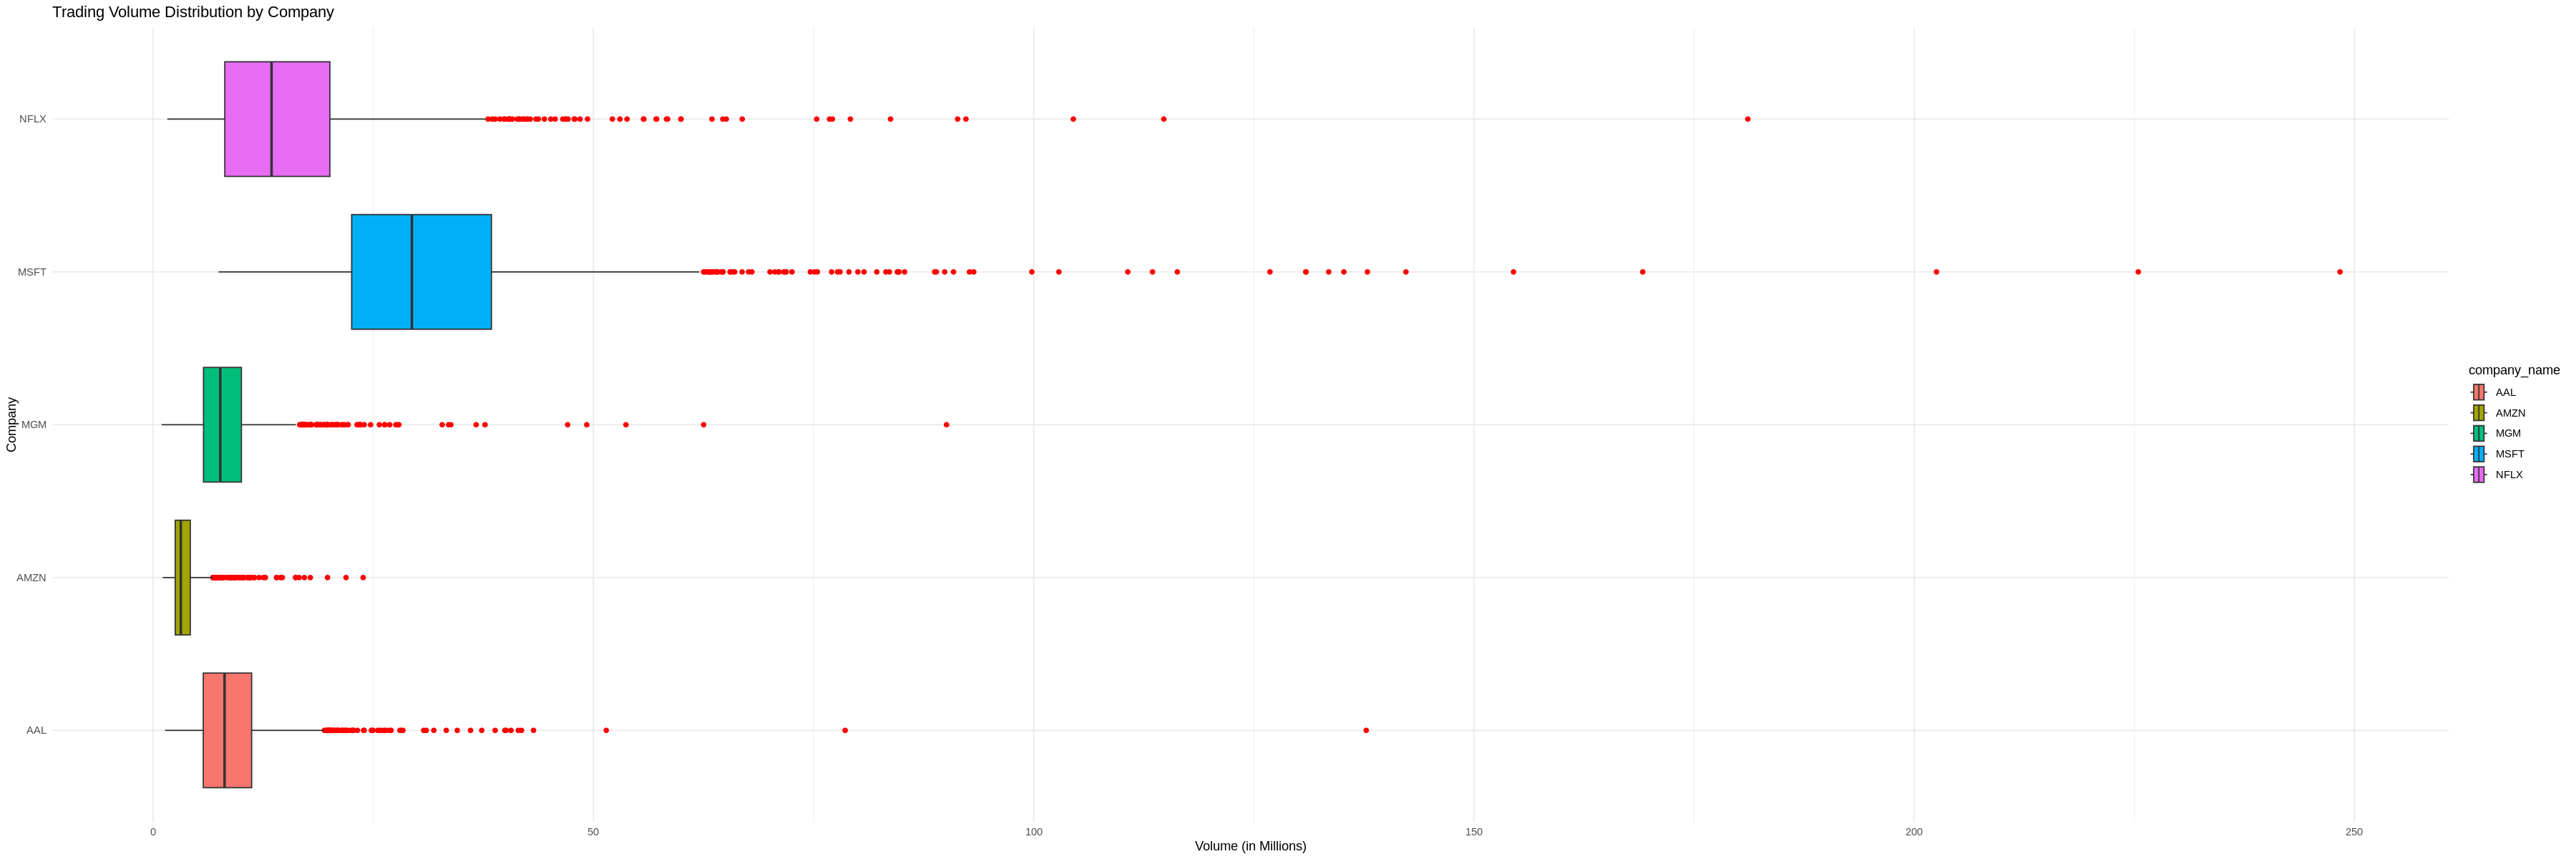

In [43]:

df_5 %>%
  ggplot(aes(x = volume / 1e6, y = company_name, fill = company_name)) +
  geom_boxplot(outlier.color = "red") +
  labs(
    title = "Trading Volume Distribution by Company",
    x = "Volume (in Millions)",
    y = "Company"
  ) +
  theme_minimal()

In [46]:
df_5 %>%
  group_by(company_name) %>%
  summarise(
    Min = min(volume),
    Q1 = quantile(volume, 0.25),
    Median = median(volume),
    Q3 = quantile(volume, 0.75),
    Max = max(volume),
    Range = Max - Min,
    IQR = IQR(volume),
  )


company_name,Min,Q1,Median,Q3,Max,Range,IQR
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
AAL,1352400,5696393,8111323,11188535,137767165,136414765,5492142
AMZN,1092970,2511165,3144719,4220246,23856060,22763090,1709082
MGM,950725,5725646,7628536,10025792,90098241,89147516,4300146
MSFT,7425603,22548791,29387581,38420244,248354245,240928642,15871454
NFLX,1616260,8139126,13452124,20071628,181099968,179483708,11932502


* Overall **"MSFT"** has the larger spread.
* Every company has the outliers
* **AMZN** has the smallest spread of results.
* **MSFT** is the leading company for volume among the 5 companies.

**Finding Monthly Total volume and converting that summarize data to visual**

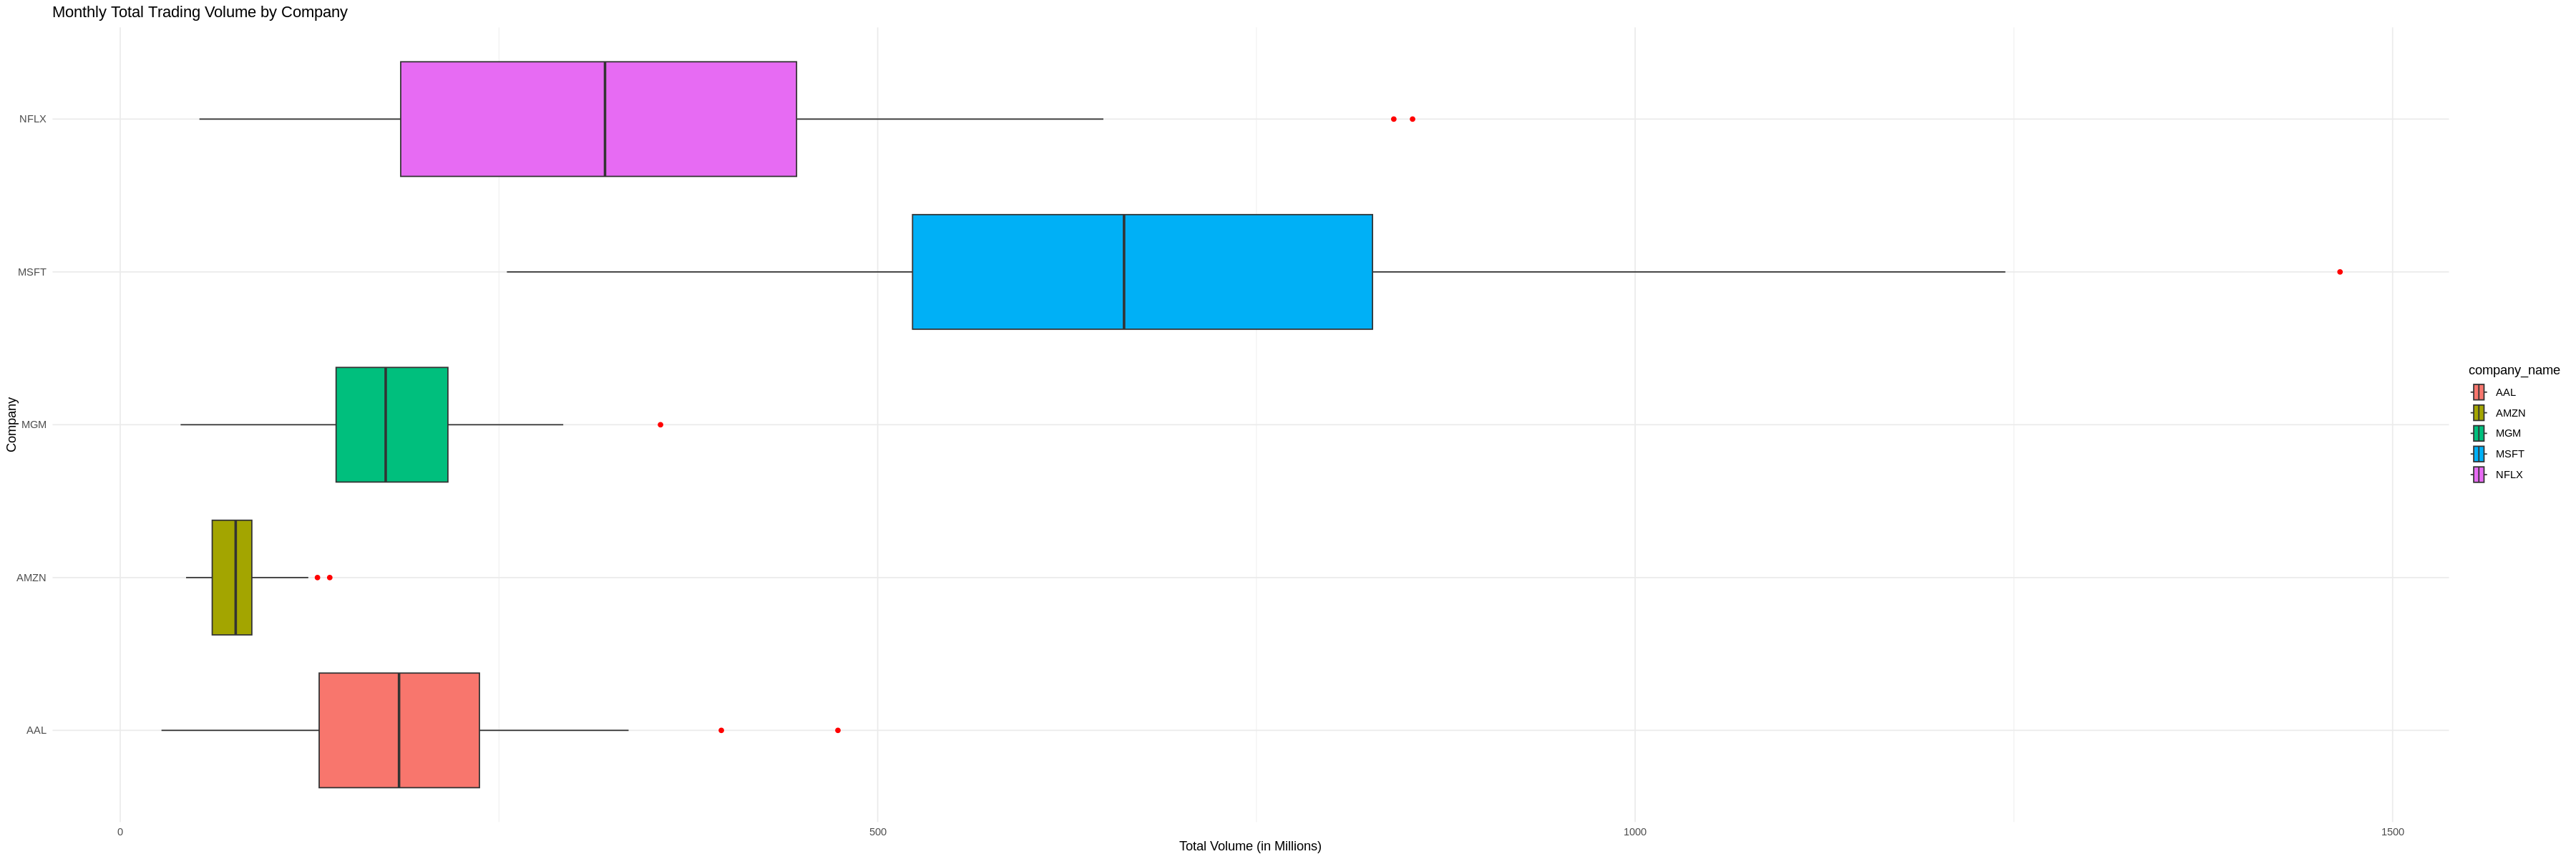

In [45]:
df_5 %>%
  mutate(
    Year = year(date),
    Month = month(date)
  ) %>%
  group_by(company_name, Year, Month) %>%
  summarise(monthly_volume = sum(volume), .groups = "drop") %>%
  ggplot(aes(x = monthly_volume / 1e6, y = company_name, fill = company_name)) +
  geom_boxplot(outlier.color = "red") +
  labs(
    title = "Monthly Total Trading Volume by Company",
    x = "Total Volume (in Millions)",
    y = "Company"
  ) +
  theme_minimal()
